<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [1]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.7.0
Using keras version 2.7.0


## Loading and preparing the MNIST dataset

Load the MNIST dataset via keras.datasets. Again, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
#from keras.datasets import ...
from keras.datasets import mnist 
data = mnist.load_data()
data
type(data)


11501568/11490434 [==============================] - 1s 0us/step


tuple

In [3]:
(X_train, y_train), (X_test, y_test) = data
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
from keras.utils.np_utils import to_categorical

num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [6]:
# Reshape to proper images with 1 color channel according to backend scheme
# Cast pixels from uint8 to float32

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?

X_train = X_train / 255
X_test = X_test / 255


## Defining the neural network architecture (i.e., the network model)

Look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic information on how to use numpy.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [8]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten , Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [9]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
from tensorflow.keras.optimizers import RMSprop
from keras import optimizers

model.compile(loss='categorical_crossentropy',
 optimizer=RMSprop(),
 metrics=['accuracy'])
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [10]:

# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 20
batch_size = 128


In [11]:
history = model.fit(X_train, y_train,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 5s 6ms/step - loss: 0.2500 - accuracy: 0.9236 - val_loss: 0.1119 - val_accuracy: 0.9670
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1029 - accuracy: 0.9677 - val_loss: 0.0906 - val_accuracy: 0.9715
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0607 - accuracy: 0.9820 - val_loss: 0.0742 - val_accuracy: 0.9800
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0772 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0440 - accuracy: 0.9874 - val_loss: 0.0684 - val_accuracy: 0.9829
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0777 - val_accuracy: 0.9815
Epoch 

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(score)

Test loss: 0.12077442556619644
[0.12077442556619644, 0.984000027179718]


In [13]:
print('Test accuracy:', score[1])

Test accuracy: 0.984000027179718


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

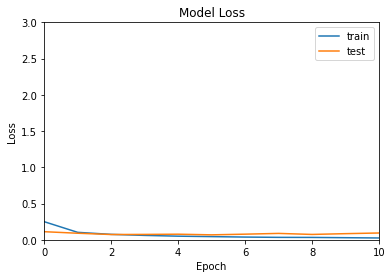

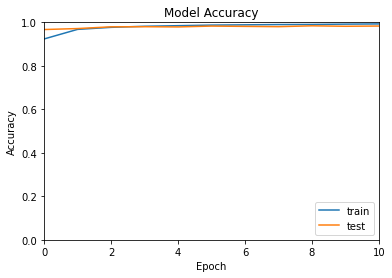

In [14]:
from matplotlib import pyplot as plt
# We now want to plot the train and validation loss functions and accuracy curves
#print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylim(top=3)
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Training-Validation-Test 
We now propose to select the optimal size for the hidden layer. We want to try different sizes: 100, 300 and 500. Since this parameter should not be selected using the test set, you need to split the training set into a training (80%) and a validation set (20%). Then, select the model that obtains the best performance on the validation set after training on the training set. Use also the score on the validation set to determine how many epochs the network should be trained. Finally, what is its performance on the test set?

## Experiments

Note down the performance of the larger network in terms of training and test accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$